# PARTIEL COURS MSPTMDA: 

## Introduction à Python pour l'analyse de données marketing.

<u> Consignes </u>:  

Tout d'abord, renommez ce notebook avec **groupe X - nom1 / nom2** avec X le numéro de votre binôme dans le fichier. Ensuite complétez le notebook pour répondre aux questions.

1 point bonus sera dédié à la clarté du code et de vos commentaires. 
N'hésitez pas à créer des cellules de type "Markdown" supplémentaires ou des commentaires pour expliquer votre raisonnement.
Merci d'indiquer au mieux la ou les questions que chaque cellule traite. 

Des graphiques peu lisibles ou sans légendes n'auront pas tous les points.

Ce partiel est un travail de groupe à réaliser à 2. Il est attendu que **les travaux de deux groupes distincts soient clairement différents**. 

Toutes les questions peuvent être résolues avec les fonctions et méthodes vues en cours. Néanmoins, vous pouvez vous aider des documentations des librairies vues en cours ainsi que des sites classiques de questions/réponses de programmation (eg: Quora, Stackoverflow) pour vous débloquer sur un point particulier.


#### MERCI DE VERIFIER QUE VOTRE CODE FONCTIONNE EN EXECUTANT LES CELLULES DE MANIERE SEQUENTIELLE (DE LA PREMIERE A LA DERNIERE). 


### EXERCICE 1: Marketing d'une plateforme d'e-commerce - 8 pts


Vous êtes en charge de la croissance d'une plateforme de e-commerce opérant en France. 
Les utilisateurs inscrits à votre site sont dans le fichier Excel <i> data_users.xlsx </i>. Les informations sont les suivantes:

- 'account_id': L'id du compte client
- 'account_country': Le pays du compte
- 'account_latitude': La latitude (format degrés décimaux) de la position du compte  
- 'account_longitude': La longitude (format degrés décimaux) de la position du compte  
- 'gender': Le sexe du client
- 'money_spent': La somme des montants commandés par chaque client depuis son inscription
- 'account_created_since': Le nombre de jours écoulés depuis l'inscription du compte
- 'last_connection_since': Le nombre de jours écoulés depuis la dernière connection à votre site


#### QUESTIONS

1) Chargez ce fichier et visualisez un example des premières lignes dans un dataframe appelé data_users. (1pt)

2) Créez une colonne appelée "has_ordered" valant 1 si le compte a déjà réalisé une commande et zéro sinon. (1pt)

3) Affichez les graphes suivants en utilisant les méthodes vues en cours en y intégrant tous les éléments graphiques qui vous semblent nécessaires ou intéressants: 

    a) Un pie chart des genres des accounts.(1pt)
    b) L'histogramme du total d'argent dépensé pour TOUS les comptes.(1pt)
    c) L'histogramme du total d'argent dépensé UNIQUEMENT pour les comptes ayant dépensé de l'argent. (1pt)

4) Vous souhaitez améliorer la retention de vos clients: Pour cela vous voulez leur envoyer un mail comprenant un code promotionnel. Cette offre ne doit concerner que les comptes ayant déjà commandé chez vous et donne: 

    - 10€ de réduction sur la prochaine commande si le compte a commandé entre 0€ (exclu) et 50€ (inclu)
    - 20€ de réduction sur la prochaine commande si le compte a commandé plus de 50€ (exclu)
   
    a) Créez un nouveau dataframe appelé 'data_clients' conservant les lignes de data_users ayant déja commandé et ne s'étant pas connectés dans les 30 derniers jours. (1pt)
    
    b) Ecrivez une fonction appelée "texte_mail()" prenant en entrée un account_id et renvoyant un exemple de texte de mail à envoyer avec la bonne offre promotionnelle. Par exemple: 
    
    "Bonjour utilisateur XXXX ! Pour récompenser votre fidélité, nous vous offrons YY euros de réduction sur votre prochaine commande"  (1pt)
    
    c) Visualisez le mail écrit pour les utilisateurs d'account_id : 30052, 92449 et 70231 (1pt)
    
5) Question Bonus: Utilisez les coordonnées fournies des comptes pour déterminer le nombre d'utilisateurs à Lyon (Disons dans un rayon de 10km de la position GPS (45.767512, 4.834889) ). 



    



In [98]:
# Nous importons dans un premier temps les librairies et le fichier csv

import pandas as pd
import numpy as np
import csv

In [99]:
#Importer la base de donnée data_users.xlsx
BDD = pd.read_excel('data_users.xlsx')

In [100]:
#Visualisation des 10 premières lignes BDD 
display(BDD.head(10))

,account_id,account_country,account_latitude,account_longitude,gender,money_spent,account_created_since,last_connection_since
0,67556,FR,46.90,6.35,M,0.0,274,16
1,29905,FR,48.53,2.68,F,0.0,560,351
2,51783,FR,46.20,-1.05,M,14.1,414,0
3,103504,FR,46.13,-1.09,F,0.0,303,207
4,49387,FR,48.96,2.54,F,0.0,383,383
5,27570,FR,48.90,2.46,F,0.0,166,157
6,30415,FR,43.31,-0.37,M,13.4,433,111
7,53742,FR,48.41,-1.16,M,0.0,709,7
8,31994,FR,45.71,4.89,M,0.0,85,85
9,108202,FR,43.29,5.36,F,0.0,106,0


In [101]:
# Creation colonne "has_ordered" valant 1 si le compte a déjà réalisé une commande et zéro sinon
BDD['has_ordered'] = np.where(BDD.money_spent>0,1,0)
display(BDD.head())


,account_id,account_country,account_latitude,account_longitude,gender,money_spent,account_created_since,last_connection_since,has_ordered
0,67556,FR,46.90,6.35,M,0.0,274,16,0
1,29905,FR,48.53,2.68,F,0.0,560,351,0
2,51783,FR,46.20,-1.05,M,14.1,414,0,1
3,103504,FR,46.13,-1.09,F,0.0,303,207,0
4,49387,FR,48.96,2.54,F,0.0,383,383,0


<AxesSubplot:title={'center':'Repartition des genres des accounts'}, ylabel='account_id'>

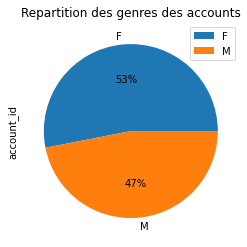

In [102]:
# Représentation sous format pie chart des genres des accounts
import matplotlib as plt
BDD.groupby(['gender']).sum().plot(kind='pie', y='account_id',autopct='%1.0f%%',title='Repartition des genres des accounts')


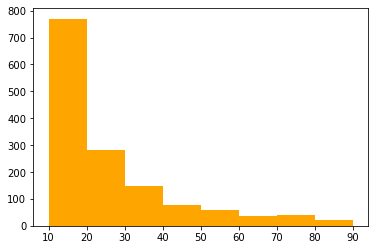

In [103]:
#Réalisation d'un histogramme du total d'argent dépensé pour TOUS les comptes
import matplotlib.pyplot as plt
spend=BDD.groupby(['account_id']).sum()
spend
x = BDD['money_spent']
bins=range(10,100,10)
plt.hist(x,bins=bins, label='histogramme du total d argent dépensé pour TOUS les comptes', color=['orange'])
plt.show()

#Mise en place du titre "histogramme du total d'argent dépensé pour TOUS les comptes" non pris en compte

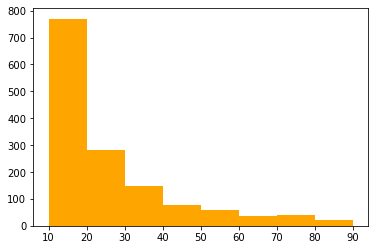

In [104]:
#histogramme du total d'argent dépensé UNIQUEMENT pour les comptes ayant dépensé de l'argent.
import matplotlib.pyplot as plt
spend=BDD.groupby(['account_id']).sum()
spend
x = BDD['money_spent']
Money=BDD[BDD['has_ordered']==1]
Money
x = Money['money_spent']
bins=range(10,100,10)
plt.hist(x,bins=bins, label='histogramme du total d argent dépensé pour TOUS les comptes', color=['orange'])
plt.show()

In [154]:
#Créez un nouveau dataframe appelé 'data_clients' conservant les lignes de data_users ayant déja commandé et ne s'étant pas connectés dans les 30 derniers jours. 

data_clients=BDD[BDD['has_ordered']==1]
data_clients=data_clients[data_clients['last_connection_since']>=30]
data_clients

,account_id,account_country,account_latitude,account_longitude,gender,money_spent,account_created_since,last_connection_since,has_ordered
6,30415,FR,43.31,-0.37,M,13.4,433,111,1
10,37117,FR,43.44,5.25,F,4.1,469,468,1
13,108836,FR,47.87,-1.80,M,9.3,1242,40,1
14,79404,FR,50.14,3.27,F,3.1,2444,103,1
16,84657,FR,48.64,2.23,M,1.8,296,276,1
...,...,...,...,...,...,...,...,...,...
19414,105291,FR,48.86,2.37,M,2.0,715,244,1
19423,99142,FR,49.10,6.24,F,7.7,677,61,1
19430,100087,FR,47.38,-1.10,F,3.1,370,166,1
19433,51614,FR,48.89,2.38,F,23.8,214,69,1


In [106]:
#Ecrivez une fonction appelée "texte_mail()" prenant en entrée un account_id et renvoyant un exemple de texte de mail à envoyer avec la bonne offre promotionnelle. Par exemple: 
    


In [107]:
#Ecrivez une fonction appelée "texte_mail()" prenant en entrée un account_id et renvoyant un exemple de texte de mail à envoyer avec la bonne offre promotionnelle. Par exemple: 
def texte_mail(account_id):
    Utilisateur = data_clients.loc[BDD['account_id'] == account_id]
    Reduction = '10' if Utilisateur['money_spent'].values <= 50 else '20'
    return "Bonjour utilisateur " + str(account_id) + " ! Pour récompenser votre fidélité, nous vous offrons " + Reduction + " euros de réductions sur votre prochaine commande." 

In [108]:
#Visualisez le mail écrit pour les utilisateurs d'account_id : 30052, 92449 et 70231
print(texte_mail(30052))
print(texte_mail(92449))
print(texte_mail(70231))

Bonjour utilisateur 30052 ! Pour récompenser votre fidélité, nous vous offrons 10 euros de réductions sur votre prochaine commande.
Bonjour utilisateur 92449 ! Pour récompenser votre fidélité, nous vous offrons 10 euros de réductions sur votre prochaine commande.
Bonjour utilisateur 70231 ! Pour récompenser votre fidélité, nous vous offrons 20 euros de réductions sur votre prochaine commande.


## Exercice 2 - 5.5 points

Données:
- Paris 1er Arrondissement	13 810 €/m2
- Paris 2e Arrondissement	12 350 €/m2
- Paris 3e Arrondissement	12 870 €/m2
- Paris 4e Arrondissement	13 710 €/m2
- Paris 5e Arrondissement	13 000 €/m2
- Paris 6e Arrondissement	15 010 €/m2
- Paris 7e Arrondissement	14 600 €/m2
- Paris 8e Arrondissement	12 620 €/m2
- Paris 9e Arrondissement	11 550 €/m2
- Paris 10e Arrondissement	10 610 €/m2
- Paris 11e Arrondissement	10 980 €/m2
- Paris 12e Arrondissement	10 280 €/m2
- Paris 13e Arrondissement	9 650 €/m2
- Paris 14e Arrondissement	10 750 €/m2
- Paris 15e Arrondissement	10 750 €/m2
- Paris 16e Arrondissement	11 440 €/m2
- Paris 17e Arrondissement	11 220 €/m2
- Paris 18e Arrondissement	10 300 €/m2
- Paris 19e Arrondissement	9 310 €/m2
- Paris 20e Arrondissement	9 640 €/m2

1) Choisir un graphique adapté pour représenter le prix du mètre carré à Paris (1pt)

2) Ecrire une fonction qui prend en entrée un arrondissement et une surface et renvoie la valeur moyenne sur le marché (1pt)

3) Ecrire une fonction qui prend en entrée une surface, un prix et un arrondissement et qui affiche: (1.5 pt)
- "Ce bien est en dessous du prix du marché !" s'il est est à plus de 5% en dessous des prix du marché,
- " Cet appartement est dans les prix" s'il est à +- 5% du prix de référence pour ce quartier 
- "Attention, cet appartement paraît cher" s'il est à plus de 5% au dessus des prix du marché pour cet arrondissement

4) Ecrire une fonction qui prend en entrée un budget et une surface, et qui renvoie la liste des arrondissements dont le prix de référence rentre dans le budget. (2 pt)

## Exercice 3 (6.5pt)

1) Importer la base de données 'unicorns.csv' donnant la liste des licornes, leur valorisation, leur secteur et leur pays. Afficher les premières lignes et le nombre de licornes dans la base (1pt)

2) Trouver quel pays a le plus de licornes dans le domaine de la FinTech (en détaillant la méthode) (1.5pt)

3) Créer un dataFrame avec les licornes françaises et l'afficher (1pt)

4) Ecrire une fonction telle qu'on passe un pays en entrée et qui affiche la valorisation moyenne de ses licornes (1pt)

5) Essayer de reproduire le plus fidélement possible le graphique graphique_ex_3.png (2pt)

In [116]:
#Importer la base de donnée unicorns.csv
BDD_3 = pd.read_csv("unicorns.csv")

In [117]:
#Visualisation des 10 premières lignes BDD_3 
display(BDD_3.head(10))

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,125.0,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,40.0,2019-05-02,United Kingdom,London,Fintech,"Tiger Global Management, Insight Partners, DST..."
7,Instacart,39.0,2014-12-30,United States,San Francisco,"Supply chain, logistics, & delivery","Khosla Ventures, Kleiner Perkins Caufield & By..."
8,Databricks,38.0,2019-02-05,United States,San Francisco,Data management & analytics,"Andreessen Horowitz, New Enterprise Associates..."
9,Revolut,33.0,2018-04-26,United Kingdom,London,Fintech,"index Ventures, DST Global, Ribbit Capital"


In [182]:
#Trouver quel pays a le plus de licornes dans le domaine de la FinTech (en détaillant la méthode) 
fintech= BDD_3[BDD_3.Industry == 'Fintech']
fintech_country = fintech['Country'].value_counts()
fintech_country.head(10)

United States     127
United Kingdom     27
India              15
China               8
Germany             6
Brazil              6
France              5
Netherlands         4
Canada              4
Mexico              4
Name: Country, dtype: int64

In [171]:
#Créer un dataFrame avec les licornes françaises et l'afficher
FR_Licorne = BDD_3[BDD_3.Country == 'France']
FR_Licorne.head(10)

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
102,Doctolib,6.40,2019-03-19,France,Paris,Health,"BPI France, Kerala Ventures, Accel"
120,Back Market,5.70,2021-05-18,France,Paris,E-commerce & direct-to-consumer,"Aglae Ventures, Eurazeo, Daphni"
145,Qonto,5.00,2022-01-11,France,Paris,Fintech,"Alven Capital, Valar Ventures, Tencent Holdings"
175,Sorare,4.30,2021-09-21,France,Paris,E-commerce & direct-to-consumer,"Benchmark, Accel, SoftBank Group"
237,Mirakl,3.50,2020-09-22,France,Paris,E-commerce & direct-to-consumer,"Elaia Partners, 83North, Felix Capital"
317,Alan,2.85,2021-04-19,France,Paris,Fintech,"Index Ventures, Temasek, Portag3 Ventures"
319,ContentSquare,2.80,2021-05-25,France,Paris,Internet software & services,"Highland Europe, Eurazeo, Canaan Partners"
332,ManoMano,2.60,2021-07-05,France,Paris,E-commerce & direct-to-consumer,"General Atlantic, Piton Capital, Partech Partners"
383,Voodoo,2.31,2020-08-17,France,Paris,Other,"Tencent Holdings, Goldman Sachs"
426,BlaBlaCar,2.00,2015-09-16,France,Paris,Auto & transportation,"Accel Partners, Index Ventures, Insight Ventur..."


In [172]:
#4) Ecrire une fonction telle qu'on passe un pays en entrée et qui affiche la valorisation moyenne de ses licornes
def Country_Licorne(country):
    Country_Licorne = BDD_3[BDD_3.Country == country]
    return Country_Licorne['Valuation ($B)'].statistics.mean()